# Lab 3

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.python.ops.numpy_ops.np_config as np_config
np_config.enable_numpy_behavior()

## Analisis Exploratorio

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [6]:
from google.colab import files
uploaded = files.upload()
# aqui se jalan sample_submission.csv, test.csv, train.csv, y todas las imagenes de prueba de alumnos

Saving 1.jpeg to 1 (1).jpeg
Saving 2.jpeg to 2 (1).jpeg
Saving 3.jpeg to 3 (1).jpeg
Saving 4.jpeg to 4 (1).jpeg
Saving 5.jpeg to 5 (1).jpeg
Saving 6.jpeg to 6 (1).jpeg
Saving 7.jpeg to 7 (1).jpeg
Saving 8.jpeg to 8 (1).jpeg
Saving 9.jpeg to 9 (1).jpeg
Saving sample_submission.csv to sample_submission (2).csv
Saving test.csv to test (3).csv
Saving train.csv to train (2).csv


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


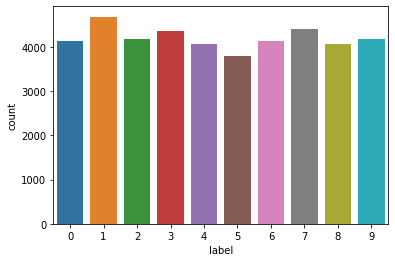

In [ ]:
sns.countplot(train['label'],data = train)

## Red neuronal

In [ ]:
(d_train, d_test), d_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

d_train = d_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
d_train = d_train.cache()
d_train = d_train.shuffle(d_info.splits['train'].num_examples)
d_train = d_train.batch(128)
d_train = d_train.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
d_test = d_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
d_test = d_test.batch(128)
d_test = d_test.cache()
d_test = d_test.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    d_train,
    epochs=6,
    validation_data=d_test,
)

Epoch 1/6
469/469 [==============================] - 10s 7ms/step - loss: 0.3515 - sparse_categorical_accuracy: 0.9033 - val_loss: 0.1919 - val_sparse_categorical_accuracy: 0.9462
Epoch 2/6
469/469 [==============================] - 2s 4ms/step - loss: 0.1609 - sparse_categorical_accuracy: 0.9549 - val_loss: 0.1376 - val_sparse_categorical_accuracy: 0.9584
Epoch 3/6
469/469 [==============================] - 2s 4ms/step - loss: 0.1162 - sparse_categorical_accuracy: 0.9660 - val_loss: 0.1087 - val_sparse_categorical_accuracy: 0.9680
Epoch 4/6
469/469 [==============================] - 2s 4ms/step - loss: 0.0881 - sparse_categorical_accuracy: 0.9745 - val_loss: 0.0907 - val_sparse_categorical_accuracy: 0.9731
Epoch 5/6
469/469 [==============================] - 2s 4ms/step - loss: 0.0712 - sparse_categorical_accuracy: 0.9797 - val_loss: 0.0861 - val_sparse_categorical_accuracy: 0.9749
Epoch 6/6
469/469 [==============================] - 2s 4ms/step - loss: 0.0586 - sparse_categorical_acc

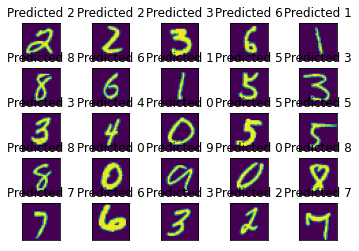

In [ ]:
for (index, (img, label)) in enumerate(d_test):
  if (index<25):
    plt.subplot(5,5,index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img[0].reshape(28,28))
    pred = np.argmax(model.predict(img)[0])
    plt.title('Predicted {}'.format(pred))
  else:
    break
plt.show()

Se puede ver que el modelo de red neuronal no es tan preciso con las predicciones de los numeros, ya que como se ve en la figura anterior, en algunos casos predijo un numero incorrecto. La presicion que se obtuvo fue de un 77%.

## Deep Learning

In [101]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# TFDS da las imágenes como tf.uint8, pero que el modelo espera tf.float32.
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [102]:
print(ds_train)

<PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>


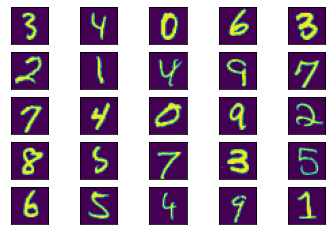

In [103]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(list(ds_train)[0][0][i].reshape(28,28))
plt.show()

In [104]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [138]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(28,(1,1), activation = 'relu', input_shape=(28,28,1)),
  tf.keras.layers.Conv2D(28,(1,1), activation = 'relu', input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10),
])

In [139]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 28)        56        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 28)        812       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 28)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5488)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               702592    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 704,750
Trainable params: 704,750
Non-trainable params: 0
________________________________________________

In [140]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

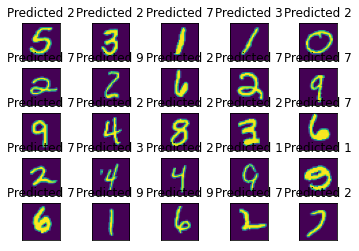

In [141]:
for (index, (img, label)) in enumerate(ds_train):
  if (index<25):
    plt.subplot(5,5,index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img[0].reshape(28,28))
    pred = np.argmax(model.predict(img)[0])
    plt.title('Predicted {}'.format(pred))
  else:
    break
plt.show()

In [142]:
history = model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 40s 84ms/step - loss: 0.3479 - sparse_categorical_accuracy: 0.8996 - val_loss: 0.1938 - val_sparse_categorical_accuracy: 0.9400
Epoch 2/6
469/469 [==============================] - 39s 84ms/step - loss: 0.1654 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.1371 - val_sparse_categorical_accuracy: 0.9587
Epoch 3/6
469/469 [==============================] - 39s 84ms/step - loss: 0.1186 - sparse_categorical_accuracy: 0.9630 - val_loss: 0.1136 - val_sparse_categorical_accuracy: 0.9652
Epoch 4/6
469/469 [==============================] - 39s 84ms/step - loss: 0.0941 - sparse_categorical_accuracy: 0.9702 - val_loss: 0.1143 - val_sparse_categorical_accuracy: 0.9650
Epoch 5/6
469/469 [==============================] - 39s 84ms/step - loss: 0.0805 - sparse_categorical_accuracy: 0.9745 - val_loss: 0.1059 - val_sparse_categorical_accuracy: 0.9670
Epoch 6/6
469/469 [==============================] - 39s 84ms/step - loss: 0.0668 - sparse_cate

In [143]:
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


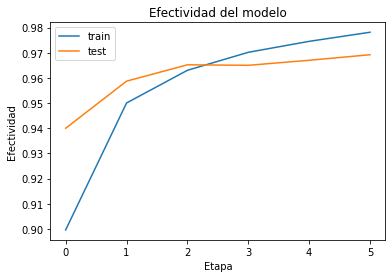

In [144]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Efectividad del modelo')
plt.ylabel('Efectividad')
plt.xlabel('Etapa')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



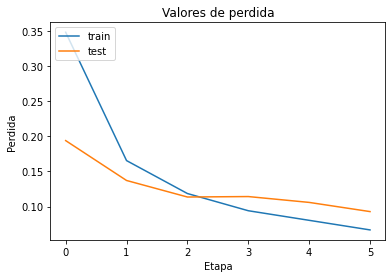

In [145]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Valores de perdida')
plt.ylabel('Perdida')
plt.xlabel('Etapa')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

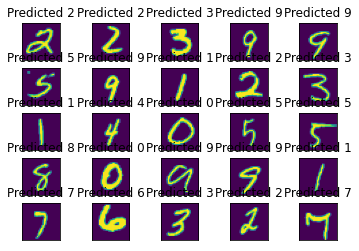

In [146]:
for (index, (img, label)) in enumerate(ds_test):
  if (index<25):
    plt.subplot(5,5,index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img[0].reshape(28,28))
    pred = np.argmax(model.predict(img)[0])
    plt.title('Predicted {}'.format(pred))
  else:
    break
plt.show()

El modelo de red neuronal con deep learinng tuvo muy buena presicion logro predecir bien los numeros como se puede ver y su presicion fue de 96%.

# Pruebas con números de estudiantes

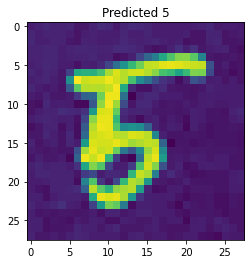

In [150]:
from PIL import Image
from torchvision import transforms
import PIL.ImageOps 
tran = transforms.ToTensor()  

# Para transformar la imagen a una escala de un solo color
rgb_weights = [0.2989, 0.5870, 0.1140]
image1 = Image.open('5.jpeg').resize((28,28), Image.ANTIALIAS)
image1 = PIL.ImageOps.invert(image1)
image_np = np.array(image1)
image_np = np.dot(image_np[...,:3], rgb_weights)

# Lo ponemos en formato para que lo entienda la red
test = np.array([image_np]*128)
plt.imshow(test[0])

test.reshape(128,28,28,1)
test = tf.expand_dims(test, 3)
prediction = model.predict(test)
pred = np.argmax(prediction[0])
plt.title('Predicted: {}'.format(pred))  
plt.show()

## KNN

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [ ]:
test.shape

(2184, 784)

In [ ]:
train.shape

(42000, 785)

In [ ]:
x = train.drop('label',axis = 1).to_numpy()
y = train['label'].to_numpy()

In [ ]:
x = x/255

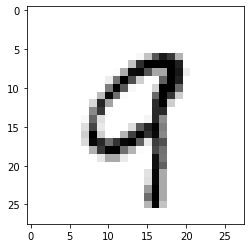

In [ ]:
plt.imshow(x[41999].reshape(28,28),cmap = matplotlib.cm.binary)
plt.show()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state = 42)

In [ ]:
x_train.shape ,x_test.shape 

((29400, 784), (12600, 784))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

accuracy = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    
    prediction = knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, prediction))

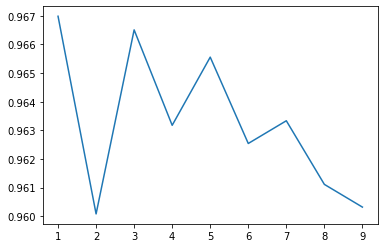

In [ ]:
plt.plot(range(1,10),accuracy)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

predictions = knn.predict(x_test)
metrics.accuracy_score(y_test,predictions)

0.9665079365079365

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1200
           1       0.95      1.00      0.97      1389
           2       0.98      0.95      0.97      1294
           3       0.96      0.96      0.96      1355
           4       0.98      0.97      0.97      1222
           5       0.96      0.96      0.96      1085
           6       0.98      0.98      0.98      1256
           7       0.96      0.97      0.96      1359
           8       0.98      0.93      0.96      1209
           9       0.95      0.95      0.95      1231

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600



In [ ]:
test = test/255

predictions = knn.predict(test)

In [ ]:
sample_submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
predictions

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

Prediccion: 2


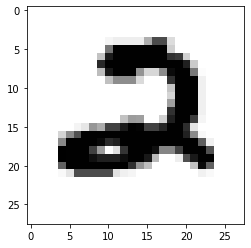

Prediccion: 0


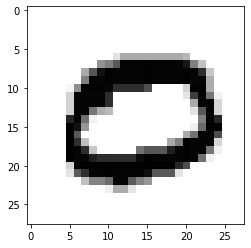

Prediccion: 9


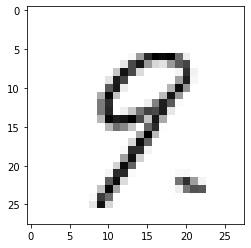

Prediccion: 9


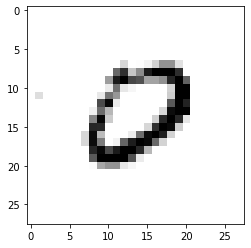

Prediccion: 3


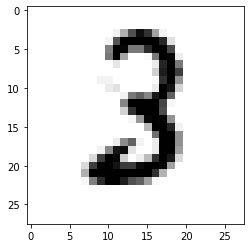

Prediccion: 7


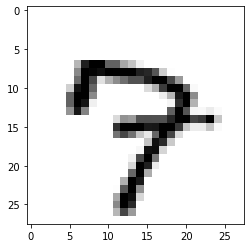

Prediccion: 0


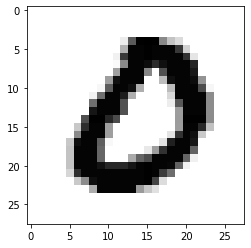

Prediccion: 3


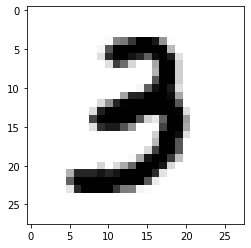

Prediccion: 0


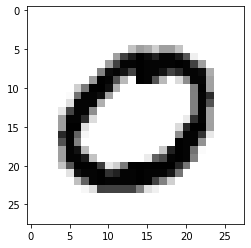

Prediccion: 3


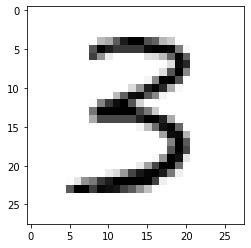

Prediccion: 5


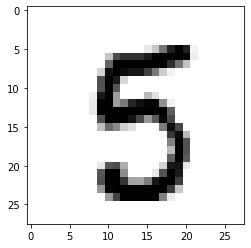

In [ ]:
for i in range(0,11):
    print('Prediccion:', predictions[i])
    plt.imshow(x[i].reshape(28,28),cmap = matplotlib.cm.binary)
    plt.show()

Se eligio KNN porque pensamos que es el modelo que tendria mejores resultados para predecir y como se puede ver asi fue ya que tuvo una presicion del 96%, y en las predicciones mostradas acerto en todas.

## Comparacion

Si se comparan las predicciones que se hicieron por todos los algoritmos, se puede ver fácilmente que la red neuronal simple, fue el pero modelo de todos, ya que falló en varias predicciones, mientras que los otros dos no fallaron. Si comparamos 